In [ ]:
import xlrd
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = "/content/drive/MyDrive/Курсова Робота/currency.xml"

In [ ]:
df = pd.read_xml(path, xpath=".//item")

In [ ]:
df.head()

,type,r030,txt,rate,cc,exchangedate
0,dict,31,Азербайджанський манат,0.101600,AZM,01.01.2012
1,dict,36,Австралійський долар,8.045983,AUD,01.01.2012
2,dict,124,Канадський долар,7.808062,CAD,01.01.2012
3,dict,156,Юань Женьмiньбi,1.264170,CNY,01.01.2012
4,dict,203,Чеська крона,0.397455,CZK,01.01.2012


In [ ]:

df.txt.unique()

array(['Азербайджанський манат', 'Австралійський долар',
       'Канадський долар', 'Юань Женьмiньбi', 'Чеська крона',
       'Данська крона', 'Форинт', 'Ісландські крони', 'Єна', 'Теньге',
       'Лати Латвії', 'Литовські лити', 'Молдовський лей',
       'Норвезька крона', 'Російський рубль', 'Сінгапурський долар',
       'Шведська крона', 'Швейцарський франк', 'Турецькі ліри',
       'Манати Туркменії', 'Фунт стерлінгів', 'Долар США',
       'Узбецький сум', 'СПЗ(спец.права запозичення)',
       'Бiлоруський рубль', 'Євро', 'Злотий', 'Вiрменський драм',
       'Болгарські леви', 'Чілійські песо', 'Куна',
       'Долари США по розр. з Індією', 'Гонконгівський долар',
       'Індійська рупія', 'Іранський ріал', 'Іракський динар',
       'Новий ізраїльський шекель', 'Вона', 'Кувейтські динари', 'Сом',
       'Ліванський фунт', 'Лівійський динар', 'Мексіканський песо',
       'Монгольский тугрик', 'Новозеландський долар',
       'Пакистанська рупія', 'Перуанский соль', 'новий румунські л

In [ ]:
df.isnull().any().any() 

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130892 entries, 0 to 130891
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   type          130892 non-null  object 
 1   r030          130892 non-null  int64  
 2   txt           130892 non-null  object 
 3   rate          130892 non-null  float64
 4   cc            130892 non-null  object 
 5   exchangedate  130892 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
date_time = pd.to_datetime(df.loc[df['cc'] == 'USD'].pop('exchangedate'), format='%d.%m.%Y')

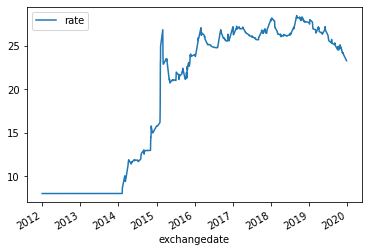

In [ ]:
plot_features = df.loc[df['cc'] == 'USD', ['rate']]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)



In [ ]:
dataset = df.loc[df['cc'] == 'USD'].pop('rate')
time = date_time

In [ ]:
dataset

21         7.989800
82         7.989700
143        7.989700
204        7.989700
265        7.989700
            ...    
130614    24.193689
130675    24.193689
130736    24.164262
130797    24.053801
130858    23.292885
Name: rate, Length: 2191, dtype: float64

In [ ]:
dataset = dataset.reset_index()

In [ ]:
dataset

,index,rate
0,21,7.989800
1,82,7.989700
2,143,7.989700
3,204,7.989700
4,265,7.989700
...,...,...
2186,130614,24.193689
2187,130675,24.193689
2188,130736,24.164262
2189,130797,24.053801


In [ ]:
dataset = dataset.pop('rate')

In [ ]:
dataset

0        7.989800
1        7.989700
2        7.989700
3        7.989700
4        7.989700
          ...    
2186    24.193689
2187    24.193689
2188    24.164262
2189    24.053801
2190    23.292885
Name: rate, Length: 2191, dtype: float64

In [ ]:
#[0:200]

In [ ]:
dataset_test = dataset

In [ ]:
dataset_test

0        7.989800
1        7.989700
2        7.989700
3        7.989700
4        7.989700
          ...    
2186    24.193689
2187    24.193689
2188    24.164262
2189    24.053801
2190    23.292885
Name: rate, Length: 2191, dtype: float64

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1), colspan=2)
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return  



Критерий Дики-Фуллера: p=0.605550


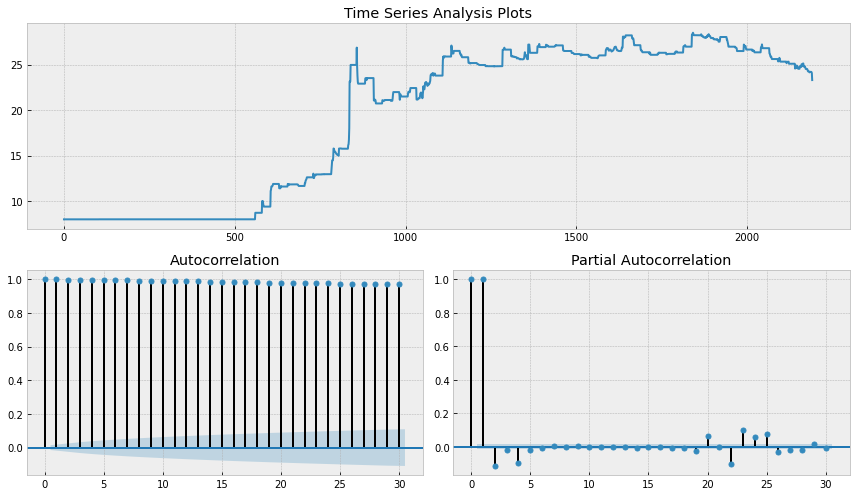

In [ ]:
tsplot(dataset, lags=30)

In [ ]:
test = sm.tsa.adfuller(dataset_test)
print ('Змінна моделювання: ', test[0] )
print ('Коефіцієнт Дікі-Фуллера: ', test[1])
print ('Похибки: ', test[4])
if test[1] == 1: 
    print ('Існують одиничні корені, ряд нестаціонарний')
else:
    print ('Одиничних коренів нема, ряд стаціонарний')
    
data = pd.Series(dataset_test)
data1 = data.diff(periods = 1).dropna()

data = []
for i in range(len(dataset)):
    data.append(float(dataset[i]))
    
mediana = np.median(data)

s_data = 0
for i in range(len(data)):
    s_data = s_data + data[i]
s_data = s_data/len(data)

STD = 0
for i in range(len(data)):
    STD = STD + (data[i] - s_data)**2
STD = np.sqrt(STD/len(data))

print(mediana)
print(max(data))
print(min(data))
print(STD)

def TriggLichModel(series, alpha):
    result = [series[0]]
    pred_er = series[0]
    pred_abser = abs(series[0])
    error = []
    abs_error = []
    for n in range(1, len(series)):
        if n == 1:
            level = series[0]
        if n >= len(series): 
            value = result[-1]
        else:
            value = series[n]
        er = alpha*(value - result[-1]) + (1-alpha)*pred_er
        abser = alpha*abs(value - result[-1]) + (1-alpha)*pred_abser
        pred_er = er
        pred_abser = abser
        a = abs(er/abser)
        level = a*value + (1-a)*level + 1-alpha
        result.append(level)
        if (n < len(series)):
            error.append(series[n] - result[-1])
            abs_error.append(abs(series[n] - result[-1]))
    return result, error, abs_error

fore, err, abs_err = TriggLichModel(data, 0.7)

s_err = 0
s_abs_err = 0
s = 0
for i in range(len(err)):
    s_err = s_err + (err[i] * err[i]) 
    s_abs_err = s_abs_err + (abs_err[i] * abs_err[i])
    s = s + data[i]    
s = s/len(err)

sigma = 0

for i in range(len(err)):
    sigma = sigma + (data[i] - s)**2

r_squared = 1 - (s_err / sigma)

d = 0
for i in range(len(err)):
    if not(i == 0):
        d = d + (err[i] - err[i-1])**2

durbin_watson = d/s_err

RMSE = np.sqrt(s_err/len(err))


Змінна моделювання:  -1.3509551601101786
Коефіцієнт Дікі-Фуллера:  0.6055501544089864
Похибки:  {'1%': -3.4333740509447717, '5%': -2.8628759187993382, '10%': -2.567481176655697}
Одиничних коренів нема, ряд стаціонарний
24.193689
28.492993
7.9867
8.100502146474291


In [ ]:
print(durbin_watson)

0.02672760133425109


In [ ]:
ans, errorry, abs_errori = TriggLichModel(data, 0.7)

In [ ]:
print(ans)

[7.9898, 8.289700005840611, 8.425328239658954, 8.611716276446117, 8.421573655386682, 8.324243844022051, 8.299960494969048, 8.292974497721993, 8.290920094206001, 8.29021127824661, 8.289993996429708, 8.289928268601749, 8.289908488162638, 8.28990254724918, 8.289900764257402, 8.289900229285614, 8.289900068786526, 8.289900020636042, 8.28990000619082, 8.289900001857248, 8.289900000557175, 8.289900000167153, 8.289900000050146, 8.289900000015043, 8.289900000004513, 8.289900000001353, 8.286700000000408, 8.288000000000121, 8.28800000000004, 8.288000000000011, 8.288000000000004, 8.288000000000002, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.288, 8.2879, 8.2879, 8.2879, 8.2879, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.287500000000001, 8.28750000000

In [ ]:
print(errorry)

[-0.3000000058406114, -0.43562823965895436, -0.622016276446117, -0.4318736553866822, -0.3345438440220514, -0.3102604949690475, -0.30327449772199255, -0.3010200942060015, -0.3003112782466113, -0.300093996429708, -0.300028268601749, -0.30000848816263836, -0.3000025472491812, -0.3000007642574021, -0.3000002292856143, -0.3000000687865265, -0.30000002063604203, -0.3000000061908201, -0.3000000018572484, -0.30000000055717546, -0.3000000001671532, -0.3000000000501464, -0.3000000000150438, -0.30000000000451355, -0.3000000000013534, -0.3000000000004084, -0.3000000000001206, -0.3000000000000389, -0.3000000000000105, -0.3000000000000034, -0.3000000000000016, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.2999999999999998, -0.299999

In [ ]:
print(abs_errori)

[0.3000000058406114, 0.43562823965895436, 0.622016276446117, 0.4318736553866822, 0.3345438440220514, 0.3102604949690475, 0.30327449772199255, 0.3010200942060015, 0.3003112782466113, 0.300093996429708, 0.300028268601749, 0.30000848816263836, 0.3000025472491812, 0.3000007642574021, 0.3000002292856143, 0.3000000687865265, 0.30000002063604203, 0.3000000061908201, 0.3000000018572484, 0.30000000055717546, 0.3000000001671532, 0.3000000000501464, 0.3000000000150438, 0.30000000000451355, 0.3000000000013534, 0.3000000000004084, 0.3000000000001206, 0.3000000000000389, 0.3000000000000105, 0.3000000000000034, 0.3000000000000016, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.2999999999999998, 0.29999999999999

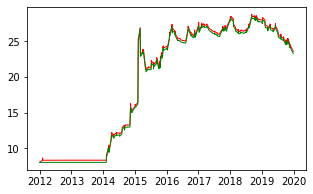

In [ ]:
df_ans = pd.DataFrame(ans)
plot_features = df_ans
plot_features.index = date_time
plot_features2 = df.loc[df['cc'] == 'USD', ['rate']]
plot_features2.index = date_time
plt.rcParams["figure.figsize"] = (5,3)

plt.plot(np.array(plot_features.index), np.array(plot_features), color='red', lw=1, )
plt.plot(np.array(plot_features2.index), np.array(plot_features2), color='green', lw=1)


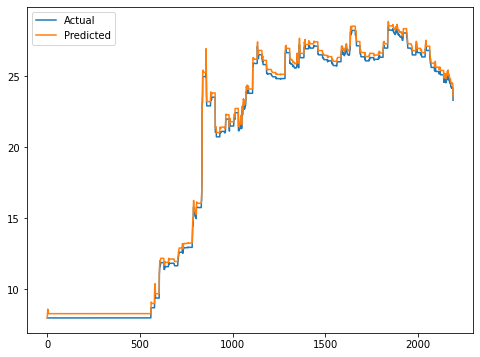

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(np.array(plot_features2), label='Actual')
plt.plot(np.array(plot_features), label='Predicted')
plt.legend()
plt.show()

LSTM-DNN

In [ ]:
def walk_forward(col, in_sample_len):
		train = []
		valid = []

		for i in range(len(col)-in_sample_len-1):
				z = col[i: (i + in_sample_len)]    

				train.append(z) # in_sample 4
				valid.append(col[i + in_sample_len]) # out of sample 1
		
		return np.array(train), np.array(valid)

In [ ]:
X, y =  walk_forward(dataset_test, 4)

In [ ]:
print(X, y)

[[ 7.9898    7.9897    7.9897    7.9897  ]
 [ 7.9897    7.9897    7.9897    7.9897  ]
 [ 7.9897    7.9897    7.9897    7.9897  ]
 ...
 [24.203928 24.183603 24.193689 24.193689]
 [24.183603 24.193689 24.193689 24.193689]
 [24.193689 24.193689 24.193689 24.164262]] [ 7.9897    7.9897    7.9897   ... 24.193689 24.164262 24.053801]


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = Sequential()
model.add(layers.LSTM(50, input_shape = (4,1), return_sequences = True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(256))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation("linear"))

model.compile(loss="mse", optimizer="adam", metrics = ['mse', 'accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4, 50)             10400     
                                                                 
 dropout_7 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 256)               314368    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 325,025
Trainable params: 325,025
Non-tr

In [ ]:
history = model.fit(x_train, y_train, epochs=30 )

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


55/55 [==============================] - 4s 67ms/step - loss: 123.7117 - mse: 123.7117 - accuracy: 0.0000e+00
Epoch 2/30
55/55 [==============================] - 4s 64ms/step - loss: 13.5318 - mse: 13.5318 - accuracy: 0.0000e+00
Epoch 3/30
55/55 [==============================] - 4s 64ms/step - loss: 4.3761 - mse: 4.3761 - accuracy: 0.0000e+00
Epoch 4/30
55/55 [==============================] - 4s 66ms/step - loss: 3.8745 - mse: 3.8745 - accuracy: 0.0000e+00
Epoch 5/30
55/55 [==============================] - 3s 63ms/step - loss: 3.6449 - mse: 3.6449 - accuracy: 0.0000e+00
Epoch 6/30
55/55 [==============================] - 3s 63ms/step - loss: 3.3511 - mse: 3.3511 - accuracy: 0.0000e+00
Epoch 7/30
55/55 [==============================] - 4s 64ms/step - loss: 3.1877 - mse: 3.1877 - accuracy: 0.0000e+00
Epoch 8/30
55/55 [==============================] - 3s 62ms/step - loss: 2.9408 - mse: 2.9408 - accuracy: 0.0000e+00
Epoch 9/30
55/55 [==============================] - 3s 62ms/step - lo

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


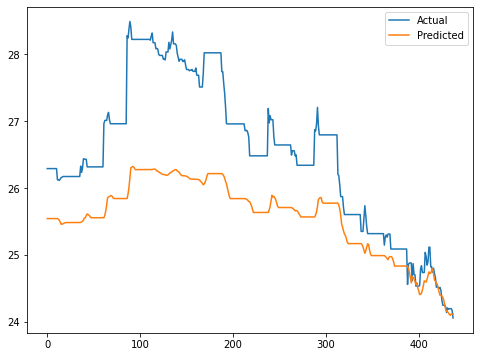

In [ ]:
y_pred = model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(y_pred,verbose=1)

 7/14 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - mse: 0.0000e+00 - accuracy: 0.0000e+00

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


14/14 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'accuracy'])


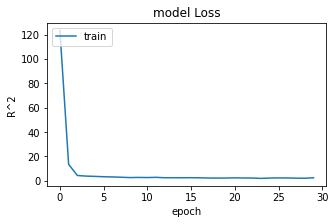

In [ ]:
plt.plot(history.history['loss'])
plt.title('model Loss')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())



dict_keys(['loss', 'mse', 'accuracy'])


In [ ]:
ans, errorry, abs_errori = TriggLichModel(np.array(y_pred), 0.7)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


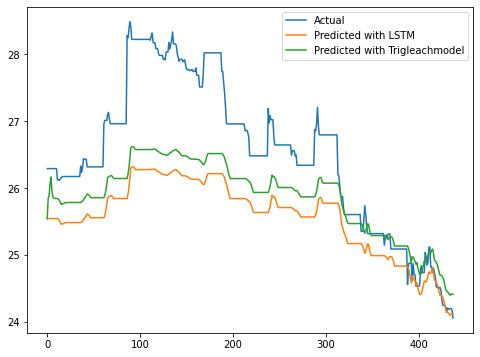

In [ ]:
y_pred = model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted with LSTM')
plt.plot(ans, label='Predicted with Trigleachmodel')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


model2 = Sequential()


model2.add(layers.Conv1D(32, kernel_size=1, activation='relu', padding='same', input_shape=(1,1,4)))
model2.add(layers.Conv1D(64, kernel_size=1, activation='relu', padding='same'))
model2.add(layers.Dropout(0.2))


model2.add(layers.Reshape((1,64)))


model2.add(layers.LSTM(100,return_sequences=True))
model2.add(layers.Dropout(0.5))
model2.add(layers.LSTM(200))
model2.add(layers.Dropout(0.5))


model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(1, activation='linear'))
model2.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy','mse'])
model2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 1, 32)          160       
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 1, 64)          2112      
                                                                 
 dropout_9 (Dropout)         (None, 1, 1, 64)          0         
                                                                 
 reshape_1 (Reshape)         (None, 1, 64)             0         
                                                                 
 lstm_8 (LSTM)               (None, 1, 100)            66000     
                                                                 
 dropout_10 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_9 (LSTM)               (None, 200)              

In [ ]:
x_train_cnn = x_train.reshape(x_train.shape[0],1,1,x_train.shape[1])
x_test_cnn = x_test.reshape(x_test.shape[0],1,1,x_test.shape[1])

In [ ]:
history2 = model2.fit(x_train_cnn,y_train,validation_split=0.1,epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


50/50 [==============================] - 7s 147ms/step - loss: 2.1169 - accuracy: 0.0000e+00 - mse: 2.1169 - val_loss: 1.6763 - val_accuracy: 0.0000e+00 - val_mse: 1.6763
Epoch 2/20
50/50 [==============================] - 3s 54ms/step - loss: 2.0136 - accuracy: 0.0000e+00 - mse: 2.0136 - val_loss: 0.6494 - val_accuracy: 0.0000e+00 - val_mse: 0.6494
Epoch 3/20
50/50 [==============================] - 3s 52ms/step - loss: 2.1324 - accuracy: 0.0000e+00 - mse: 2.1324 - val_loss: 1.0274 - val_accuracy: 0.0000e+00 - val_mse: 1.0274
Epoch 4/20
50/50 [==============================] - 3s 54ms/step - loss: 1.8749 - accuracy: 0.0000e+00 - mse: 1.8749 - val_loss: 1.2438 - val_accuracy: 0.0000e+00 - val_mse: 1.2438
Epoch 5/20
50/50 [==============================] - 3s 51ms/step - loss: 2.2244 - accuracy: 0.0000e+00 - mse: 2.2244 - val_loss: 1.1735 - val_accuracy: 0.0000e+00 - val_mse: 1.1735
Epoch 6/20
50/50 [==============================] - 3s 52ms/step - loss: 2.2509 - accuracy: 0.0000e+00 - 

In [ ]:
y_pred = model2.predict(x_test_cnn)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


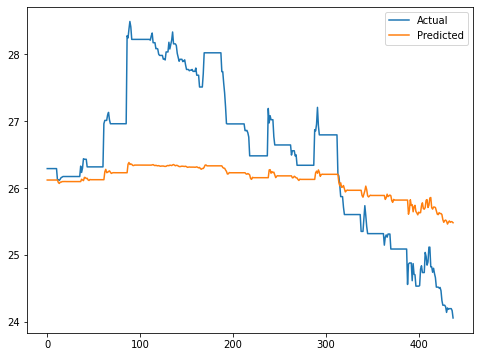

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
print(history2.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


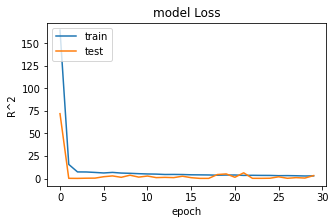

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model Loss')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

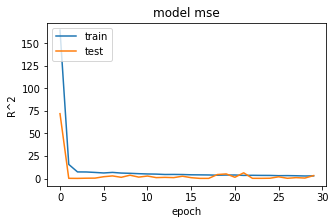

In [ ]:
plt.plot(history2.history['mse'])
plt.plot(history2.history['val_mse'])
plt.title('model mse')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())



In [ ]:
ans, errorry, abs_errori = TriggLichModel(np.array(y_pred), 0.7)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


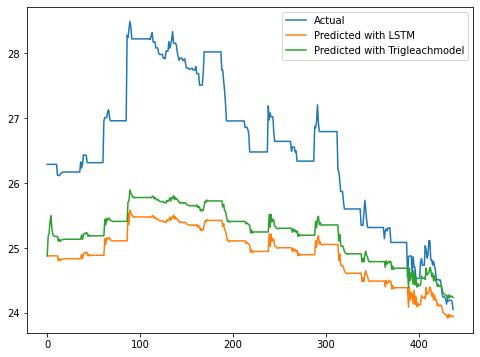

In [ ]:
y_pred = model2.predict(x_test_cnn)
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted with CNN')
plt.plot(ans, label='Predicted with Trigleachmodel')
plt.legend()
plt.show()

In [ ]:
ans, errorry, abs_errori = TriggLichModel(np.array(y_pred), 0.7)

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted with LSTM')
plt.plot(ans, label='Predicted with Trigleachmodel')
plt.legend()
plt.show()